In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from math import sqrt
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import statistics 
from missingpy import KNNImputer
from missingpy import MissForest

c:\users\91963\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


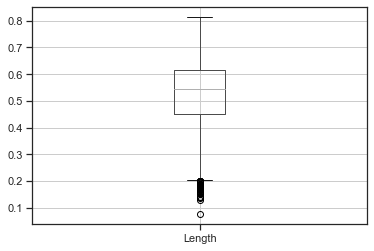

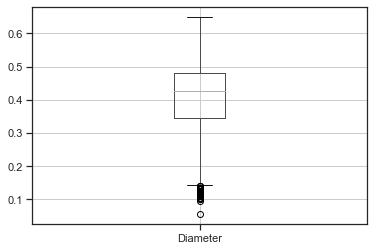

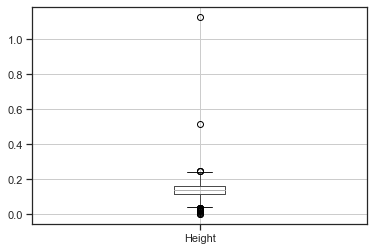

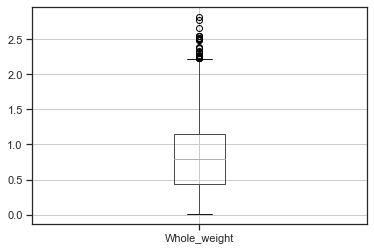

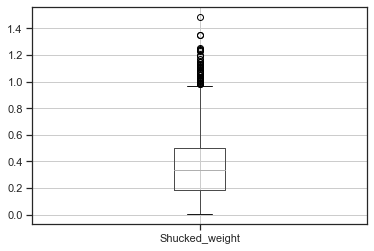

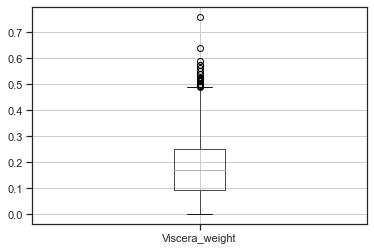

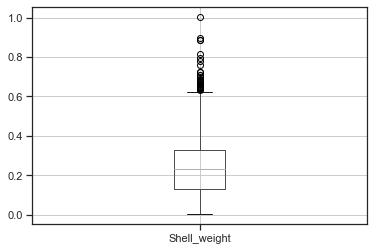

In [23]:
data = pd.read_excel("Data_nan.xlsx")
b=['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
new_data = data
for i in b :
    plt.figure(i)
    boxplot = new_data.boxplot(i)
    plt.show()

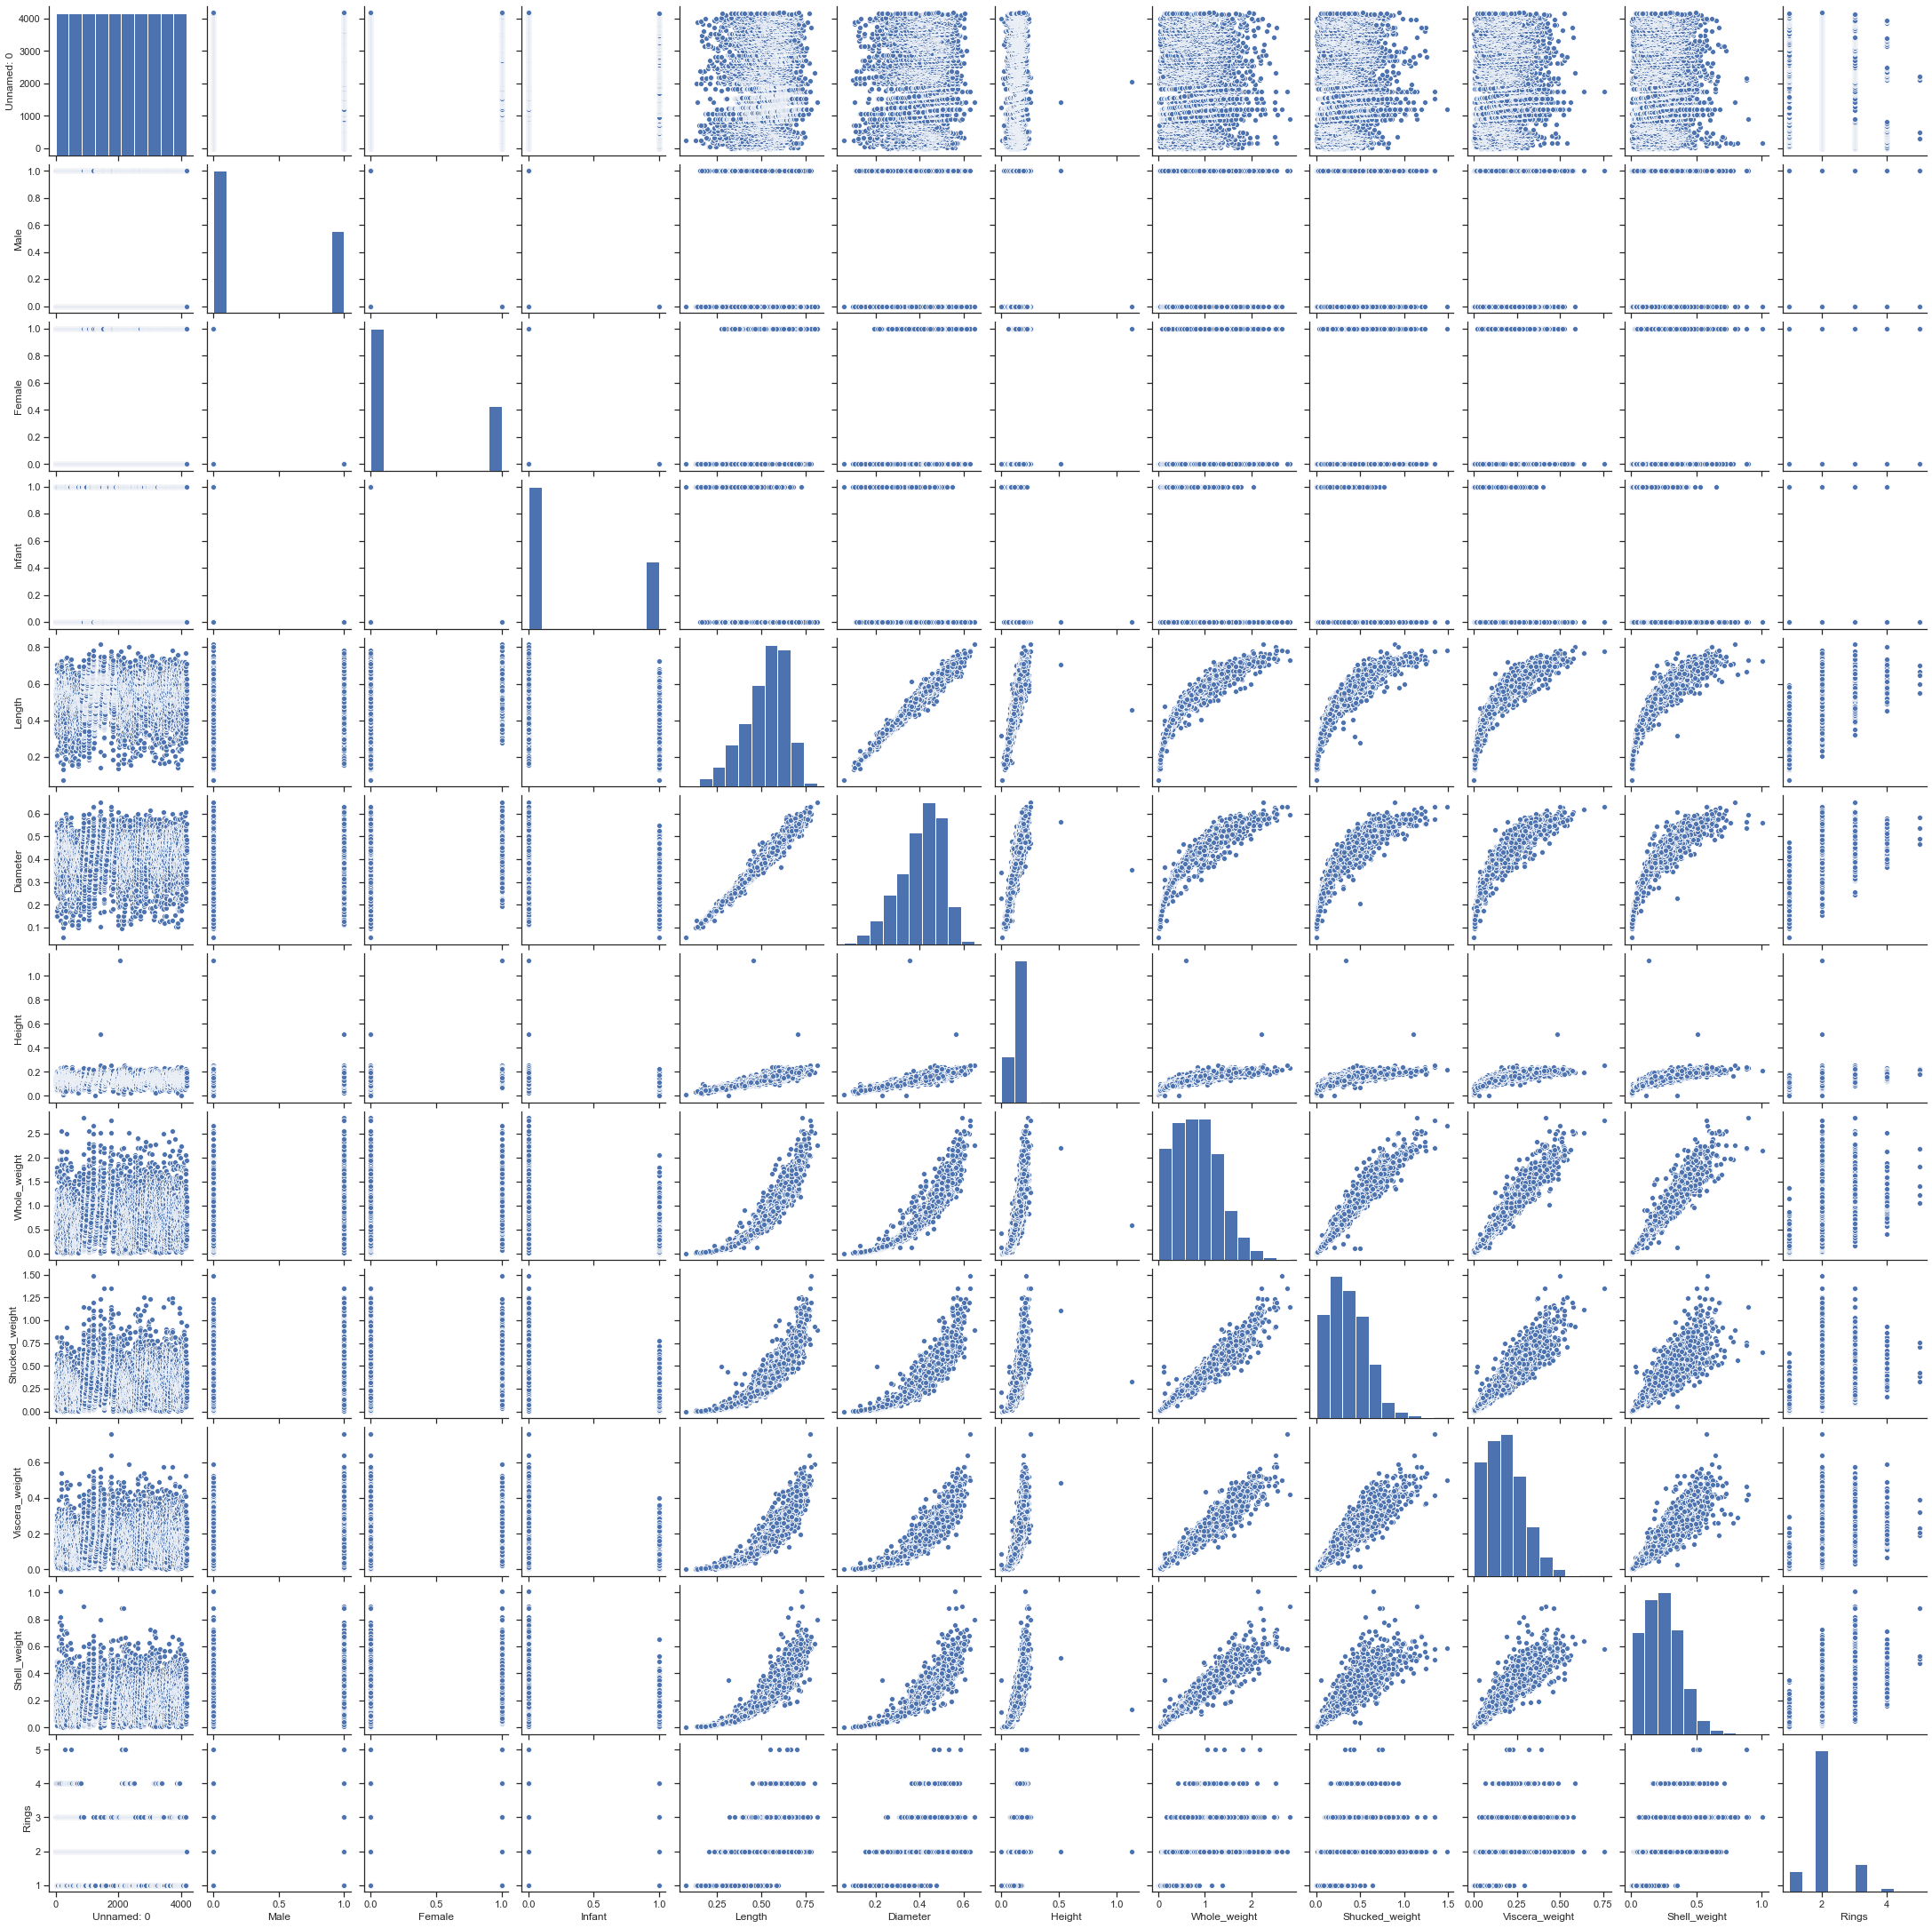

In [4]:
sns.set(style="ticks")
sns.pairplot(data)

In [24]:
data.head(10)

,Unnamed: 0,Male,Female,Infant,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,3,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,4,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2
5,5,0,0,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,2
6,6,0,1,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,4
7,7,0,1,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,3
8,8,1,0,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,2
9,9,0,1,0,0.550,0.440,NaN,0.8945,0.3145,0.1510,0.320,4


### Replacing data with mean and written to the file mean_data  

In [25]:
new_data1 = data = pd.read_excel("Data_nan.xlsx")
for i in b :
    new_data1[i].replace(np.nan,np.mean(new_data1[i]),inplace=True)
new_data1.head(20)




,Unnamed: 0,Male,Female,Infant,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0,0,0.45500,0.3650,0.095000,0.5140,0.2245,0.101000,0.150,3
1,1,1,0,0,0.35000,0.2650,0.090000,0.2255,0.0995,0.048500,0.070,2
2,2,0,1,0,0.53000,0.4200,0.135000,0.6770,0.2565,0.141500,0.210,2
3,3,1,0,0,0.44000,0.3650,0.125000,0.5160,0.2155,0.114000,0.155,2
4,4,0,0,1,0.33000,0.2550,0.080000,0.2050,0.0895,0.039500,0.055,2
5,5,0,0,1,0.42500,0.3000,0.095000,0.3515,0.1410,0.077500,0.120,2
6,6,0,1,0,0.53000,0.4150,0.150000,0.7775,0.2370,0.141500,0.330,4
7,7,0,1,0,0.54500,0.4250,0.125000,0.7680,0.2940,0.149500,0.260,3
8,8,1,0,0,0.47500,0.3700,0.125000,0.5095,0.2165,0.112500,0.165,2
9,9,0,1,0,0.55000,0.4400,0.139719,0.8945,0.3145,0.151000,0.320,4


In [28]:
new_data1.select_dtypes(include=['object']).isnull().sum()
new_data1.select_dtypes(include=[np.number]).isnull().sum()
new_data1.to_excel('mean_data.xlsx')
new_data1.head(20)

,Unnamed: 0,Male,Female,Infant,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0,0,0.45500,0.3650,0.095000,0.5140,0.2245,0.101000,0.150,3
1,1,1,0,0,0.35000,0.2650,0.090000,0.2255,0.0995,0.048500,0.070,2
2,2,0,1,0,0.53000,0.4200,0.135000,0.6770,0.2565,0.141500,0.210,2
3,3,1,0,0,0.44000,0.3650,0.125000,0.5160,0.2155,0.114000,0.155,2
4,4,0,0,1,0.33000,0.2550,0.080000,0.2050,0.0895,0.039500,0.055,2
5,5,0,0,1,0.42500,0.3000,0.095000,0.3515,0.1410,0.077500,0.120,2
6,6,0,1,0,0.53000,0.4150,0.150000,0.7775,0.2370,0.141500,0.330,4
7,7,0,1,0,0.54500,0.4250,0.125000,0.7680,0.2940,0.149500,0.260,3
8,8,1,0,0,0.47500,0.3700,0.125000,0.5095,0.2165,0.112500,0.165,2
9,9,0,1,0,0.55000,0.4400,0.139719,0.8945,0.3145,0.151000,0.320,4


### Impute missing values with median and written to median_data file

In [29]:
a= []
for i in b:
    a.append(np.median(data[i]))

In [181]:
a0= a[0]
a1=a[1]
a2=a[2]
a3=a[3]
a4=a[4]
a5=a[5]
a6 =a[6]

new_data2  = pd.read_excel("Data_nan.xlsx")
new_data2[b[0]].replace(np.nan,a[0],inplace=True)
new_data2[b[1]].replace(np.nan,a[1],inplace=True)
new_data2[b[2]].replace(np.nan,a[2],inplace=True)
new_data2[b[3]].replace(np.nan,a[3],inplace=True)
new_data2[b[4]].replace(np.nan,a[4],inplace=True)
new_data2[b[5]].replace(np.nan,a[5],inplace=True)
new_data2[b[6]].replace(np.nan,a[6],inplace=True)
new_data2.to_excel('median_data.xlsx')


### Imputation Using k-NN and write a file as a knn_data

In [182]:
new_data3=  pd.read_excel("Data_nan.xlsx")
cl = new_data3.columns
X = new_data3
imputer = KNNImputer(n_neighbors=32, weights="uniform")
y= imputer.fit_transform(X)
y = y.transpose()
print(y)

C:\Users\santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\santosh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


[[1.         1.         0.         ... 1.         0.         1.        ]
 [0.         0.         1.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.101      0.0485     0.1415     ... 0.2875     0.261      0.40185938]
 [0.15       0.07       0.21       ... 0.308      0.296      0.495     ]
 [3.         2.         2.         ... 2.         2.         2.        ]]


In [183]:
data = y

df = pd.DataFrame(data)
df = df.transpose()
df.columns = cl
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()
df.to_excel('knn_data.xlsx')

In [184]:
new_data3=  pd.read_excel("Data_nan.xlsx")
cl = new_data3.columns
X = new_data3
imputer = MissForest()
y= imputer.fit_transform(X)
y = y.transpose()
print(y)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
[[1.       1.       0.       ... 1.       0.       1.      ]
 [0.       0.       1.       ... 0.       1.       0.      ]
 [0.       0.       0.       ... 0.       0.       0.      ]
 ...
 [0.101    0.0485   0.1415   ... 0.2875   0.261    0.433725]
 [0.15     0.07     0.21     ... 0.308    0.296    0.495   ]
 [3.       2.       2.       ... 2.       2.       2.      ]]


### Imputation Using Random Forest and write a file as a forest_data

In [185]:
data = y
df = pd.DataFrame(data)
df = df.transpose()
df.columns = cl
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()
print(df)
df.to_excel('forest_data.xlsx')

      Male  Female  Infant   Length  Diameter   Height  Whole_weight  \
0      1.0     0.0     0.0  0.45500   0.36500  0.09500      0.514000   
1      1.0     0.0     0.0  0.35000   0.26500  0.09000      0.225500   
2      0.0     1.0     0.0  0.53000   0.42000  0.13500      0.677000   
3      1.0     0.0     0.0  0.44000   0.36500  0.12500      0.516000   
4      0.0     0.0     1.0  0.33000   0.25500  0.08000      0.205000   
5      0.0     0.0     1.0  0.42500   0.30000  0.09500      0.351500   
6      0.0     1.0     0.0  0.53000   0.41500  0.15000      0.777500   
7      0.0     1.0     0.0  0.54500   0.42500  0.12500      0.768000   
8      1.0     0.0     0.0  0.47500   0.37000  0.12500      0.509500   
9      0.0     1.0     0.0  0.55000   0.44000  0.15980      0.894500   
10     0.0     1.0     0.0  0.52500   0.40105  0.14000      0.606500   
11     1.0     0.0     0.0  0.43000   0.35000  0.11000      0.406000   
12     1.0     0.0     0.0  0.49000   0.38000  0.13500      0.54